In [1]:
import glob
import fitsio
import proplot as pplt
import numpy as np

In [2]:
import random

fnames = sorted(glob.glob("../2022_01_22_run_mdet_final_v1/data_final/*.fits"))
n_keep = 10

random.shuffle(fnames)

In [3]:
import tqdm

d = []
for i in tqdm.trange(n_keep):
    d.append(fitsio.read(fnames[i]))
d = np.concatenate(d)

100%|██████████| 10/10 [00:32<00:00,  3.27s/it]


In [4]:
mag_g = 30.0 - 2.5*np.log10(d["mdet_g_flux"])
mag_r = 30.0 - 2.5*np.log10(d["mdet_r_flux"])
mag_i = 30.0 - 2.5*np.log10(d["mdet_i_flux"])
mag_z = 30.0 - 2.5*np.log10(d["mdet_z_flux"])
gmr = mag_g - mag_r
rmi = mag_r - mag_i
imz = mag_i - mag_z

msk = (
    (d["flags"] == 0)
    & (d["mask_flags"] == 0)
    & (d["mdet_flux_flags"] == 0)
    & (d["mdet_T_ratio"] > 0.5)
    & (d["mdet_s2n"] > 10)
    & (d["mfrac"] < 0.1)
    & (d["mdet_T"] < 1.9 - 2.8*d["mdet_T_err"])
    & (np.abs(gmr) < 5)
    & (np.abs(rmi) < 5)
    & (np.abs(imz) < 5)
    & np.isfinite(mag_g)
    & np.isfinite(mag_r)
    & np.isfinite(mag_i)
    & np.isfinite(mag_z)
    & (mag_g < 26.5)
    & (mag_r < 26.5)
    & (mag_i < 26.2)
    & (mag_z < 25.6)
)

/gpfs02/astro/workarea/beckermr/tmp/ipykernel_25833/2940946498.py:1: RuntimeWarning: invalid value encountered in log10
  mag_g = 30.0 - 2.5*np.log10(d["mdet_g_flux"])
/gpfs02/astro/workarea/beckermr/tmp/ipykernel_25833/2940946498.py:2: RuntimeWarning: invalid value encountered in log10
  mag_r = 30.0 - 2.5*np.log10(d["mdet_r_flux"])
/gpfs02/astro/workarea/beckermr/tmp/ipykernel_25833/2940946498.py:3: RuntimeWarning: invalid value encountered in log10
  mag_i = 30.0 - 2.5*np.log10(d["mdet_i_flux"])
/gpfs02/astro/workarea/beckermr/tmp/ipykernel_25833/2940946498.py:4: RuntimeWarning: invalid value encountered in log10
  mag_z = 30.0 - 2.5*np.log10(d["mdet_z_flux"])


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 6.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 6.0000e+00,
        4.0000e+00, 4.0000e+00, 4.0000e+00, 7.0000e+00, 6.0000e+00,
        1.4000e+01, 1.6000e+01, 3.2000e+01, 5.3000e+01, 6.4000e+01,
        6.3000e+01, 9.5000e+01, 9.8000e+01, 1.3400e+02, 1.6600e+02,
        2.0100e+02, 2.6300e+02, 2.6900e+02, 3.8300e+02, 5.2800e+02,
        6.8000e+02, 8.6000e+02, 1.1980e+03, 1.6740e+03, 2.2250e+03,
        2.9980e+03, 4.2630e+03, 5.6610e+03, 7.2250e+03, 9.7250e+03,
        1.2828e+04, 1.6300e+04, 1.9726e+04, 2.3564e+04, 2.7911e+04,
        3.1753e+04, 3.6842e+04, 4.0335e+04, 4.2257e+04, 4.4510e+04,
        4.5537e+04, 4.4531e+04, 4.2028e+04, 3.8426e+04, 3.3264e+04,
        2.8498e+04, 2.5772e+04, 2.2020e+04, 1.8544e+04, 1.6370e+04,
        1.4519e+04, 1.3028e+04, 1.1745e+04, 1.0727e+04, 1.0254e+04,
        9.4920e+03, 9.2100e+03, 7.7250e+03, 6.96

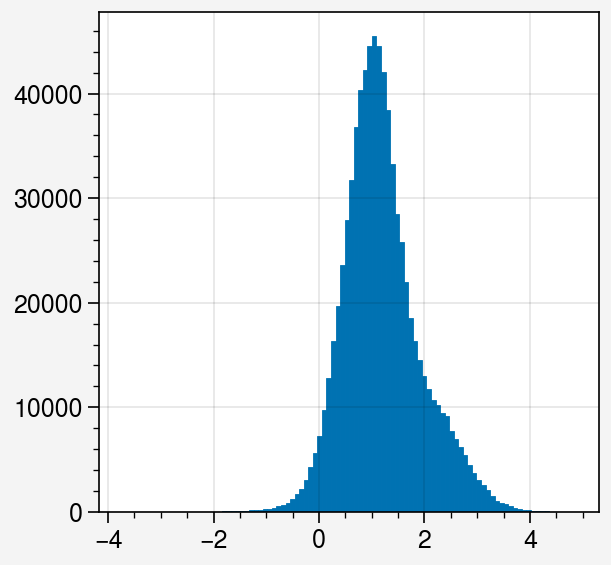

In [5]:
gmi = mag_g - mag_i

fig, axs = pplt.subplots()
axs.hist(gmi[msk], bins=100)

array([1.10495284])

In [14]:
_msk = msk & (gmi > 0) & (gmi < 3)
print(np.quantile(gmi[msk], [0.5]))
print(np.quantile(gmi[_msk], np.arange(4) * 0.25 + 0.25/2))
print(np.arange(4) * 1.5/2 + 1.5/4)

[1.10495284]
[0.50420342 0.93930486 1.30403829 1.99624049]
[0.375 1.125 1.875 2.625]


In [25]:
np.arange(4) * 0.25 + 0.25/2

array([0.125, 0.375, 0.625, 0.875])

In [26]:
(np.arange(8) * 0.125)

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875])

In [7]:
DES_GMI_BE = np.array([
    -2.8886816, -2.79877759, -2.70887357, -2.61896955, -2.52906553,
    -2.43916152, -2.3492575, -2.25935348, -2.16944947, -2.07954545,
    -1.98964143, -1.89973741, -1.8098334, -1.71992938, -1.63002536,
    -1.54012135, -1.45021733, -1.36031331, -1.27040929, -1.18050528,
    -1.09060126, -1.00069724, -0.91079323, -0.82088921, -0.73098519,
    -0.64108117, -0.55117716, -0.46127314, -0.37136912, -0.28146511,
    -0.19156109, -0.10165707, -0.01175305,  0.07815096,  0.16805498,
    0.257959,  0.34786301,  0.43776703,  0.52767105, 0.61757506,
    0.70747908,  0.7973831, 0.88728712,  0.97719113,  1.06709515,
    1.15699917,  1.24690318,  1.3368072, 1.42671122,  1.51661524,
    1.60651925,  1.69642327,  1.78632729,  1.8762313, 1.96613532,
    2.05603934,  2.14594336,  2.23584737,  2.32575139,  2.41565541,
    2.50555942,  2.59546344,  2.68536746,  2.77527148,  2.86517549,
    2.95507951,  3.04498353,  3.13488754,  3.22479156,  3.31469558,
    3.4045996, 3.49450361,  3.58440763,  3.67431165,  3.76421566,
    3.85411968,  3.9440237, 4.03392771,  4.12383173,  4.21373575,
    4.30363977,  4.39354378,  4.4834478, 4.57335182,  4.66325583,
    4.75315985,  4.84306387,  4.93296789,  5.0228719, 5.11277592,
    5.20267994,  5.29258395,  5.38248797,  5.47239199,  5.56229601,
    5.65220002,  5.74210404,  5.83200806,  5.92191207,  6.01181609,
    6.10172011
])


DES_GMI_CDF = np.array([
    0.00000000e+00, 2.30887960e-06, 2.30887960e-06, 2.30887960e-06,
    4.61775921e-06, 9.23551842e-06, 1.03899582e-05, 1.38532776e-05,
    2.30887960e-05, 3.57876339e-05, 5.42586707e-05, 6.46486289e-05,
    8.65829852e-05, 1.22370619e-04, 1.66239332e-04, 2.36660159e-04,
    3.31324223e-04, 4.44459324e-04, 5.89918739e-04, 7.95409024e-04,
    1.02052479e-03, 1.30451698e-03, 1.68317323e-03, 2.18073679e-03,
    2.86416515e-03, 3.65380197e-03, 4.75051979e-03, 6.23166605e-03,
    8.22653803e-03, 1.08944484e-02, 1.46336789e-02, 1.96716542e-02,
    2.67806945e-02, 3.67319656e-02, 5.01130774e-02, 6.75335740e-02,
    8.94933279e-02, 1.17302628e-01, 1.50583973e-01, 1.89486286e-01,
    2.36229553e-01, 2.88100843e-01, 3.45242150e-01, 4.03848441e-01,
    4.64133287e-01, 5.25280500e-01, 5.82576502e-01, 6.35287069e-01,
    6.82508274e-01, 7.22752046e-01, 7.57407174e-01, 7.86948134e-01,
    8.12696760e-01, 8.34314800e-01, 8.54055720e-01, 8.71745201e-01,
    8.87671853e-01, 9.02349400e-01, 9.15968327e-01, 9.28925759e-01,
    9.40861512e-01, 9.51694775e-01, 9.60682089e-01, 9.68386820e-01,
    9.74789344e-01, 9.80054744e-01, 9.84427762e-01, 9.87958038e-01,
    9.90974590e-01, 9.93310021e-01, 9.95089013e-01, 9.96529754e-01,
    9.97524881e-01, 9.98170213e-01, 9.98704719e-01, 9.99124935e-01,
    9.99414699e-01, 9.99613263e-01, 9.99742560e-01, 9.99830297e-01,
    9.99891483e-01, 9.99936506e-01, 9.99965367e-01, 9.99971139e-01,
    9.99981529e-01, 9.99983838e-01, 9.99987301e-01, 9.99991919e-01,
    9.99996537e-01, 9.99996537e-01, 9.99996537e-01, 9.99996537e-01,
    9.99996537e-01, 9.99996537e-01, 9.99996537e-01, 9.99996537e-01,
    9.99996537e-01, 9.99996537e-01, 9.99996537e-01, 9.99998846e-01,
    1.00000000e+00
])


def _draw_des_gmi(n, rng):
    x = rng.uniform(size=n)
    return np.interp(x, DES_GMI_CDF, DES_GMI_BE)


In [8]:
np.interp(0.5, DES_GMI_CDF, DES_GMI_BE)

1.1198295515316978

In [12]:
np.interp(np.arange(4) * 0.25 + 0.25/2, DES_GMI_CDF, DES_GMI_BE)

array([0.4585602 , 0.93293666, 1.3192614 , 2.07441229])

In [25]:
v = _draw_des_gmi(10000, np.random)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,
          0.,   1.,   0.,   2.,   3.,   1.,   2.,   3.,   5.,   4.,   7.,
         12.,  20.,  16.,  30.,  29.,  36.,  70.,  86., 121., 161., 213.,
        263., 309., 344., 435., 480., 489., 499., 553., 556., 573., 499.,
        518., 442., 396., 305., 272., 272., 209., 180., 199., 157., 150.,
        143., 118., 108., 108., 102.,  93.,  84.,  61.,  51.,  47.,  44.,
         21.,  23.,  17.,  12.,   8.,   8.,   6.,   5.,   6.,   3.,   0.,
          1.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-2.44533998, -2.3613747 , -2.27740941, -2.19344412, -2.10947884,
        -2.02551355, -1.94154826, -1.85758297, -1.77361769, -1.6896524 ,
        -1.60568711, -1.52172183, -1.43775654, -1.35379125, -1.26982596,
        -1.18586068, -1.10189539, -1.0179301 , -0.93396482, -0.84999953,
        -0.76603424, -0.68

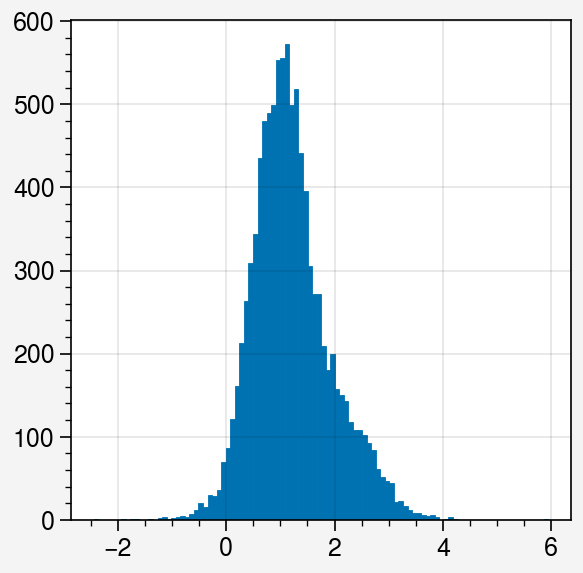

In [26]:
fig, axs = pplt.subplots()
axs.hist(v, bins=100)

In [22]:
color = 1
colors = np.array([0.50420342, 0.93930486, 1.30403829, 1.99624049])

int(np.argmin(np.abs(color - colors)))

1

In [33]:
ll = np.quantile(gmi[msk], [0.2, 0.8])
print(ll)
_msk = msk & (gmi > ll[0]) & (gmi < ll[1])
print(np.quantile(gmi[_msk], np.arange(4) * 0.25 + 0.25/2))

[0.61707776 1.72290952]
[0.75754348 0.99408925 1.21975318 1.50845878]


In [34]:
# PSF_FWHM g-band (27028965 total stars)
fwhm = np.array([1.11300004, 1.11099994, 1.11099994, 1.10899997, 1.10699999,
       1.10899997, 1.11399996, 1.12199998, 1.12800002, 1.13199997,
       1.13      , 1.12899995, 1.12800002, 1.12800002, 1.12800002,
       1.12699997, 1.125     , 1.12399995, 1.12300003, 1.12199998,
       1.12      , 1.11899996, 1.11800003, 1.11600006, 1.11500001,
       1.11399996, 1.15400004, 1.11099994, 1.11000001, 1.10800004,
       1.10699999, 1.10500002, 1.10300004, 1.102     , 1.10099995,
       1.09899998, 1.09800005, 1.09599996, 1.09399998, 1.09300005,
       1.09300005, 1.09099996, 1.09000003, 1.08899999, 1.08800006,
       1.08700001, 1.08500004, 1.08299994, 1.08099997, 1.079     ])

# bin edges for g-i color
c = np.array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ,
       0.66, 0.72, 0.78, 0.84, 0.9 , 0.96, 1.02, 1.08, 1.14, 1.2 , 1.26,
       1.32, 1.38, 1.44, 1.5 , 1.56, 1.62, 1.68, 1.74, 1.8 , 1.86, 1.92,
       1.98, 2.04, 2.1 , 2.16, 2.22, 2.28, 2.34, 2.4 , 2.46, 2.52, 2.58,
       2.64, 2.7 , 2.76, 2.82, 2.88, 2.94, 3.  ])

<a list of 1 Line2D objects>

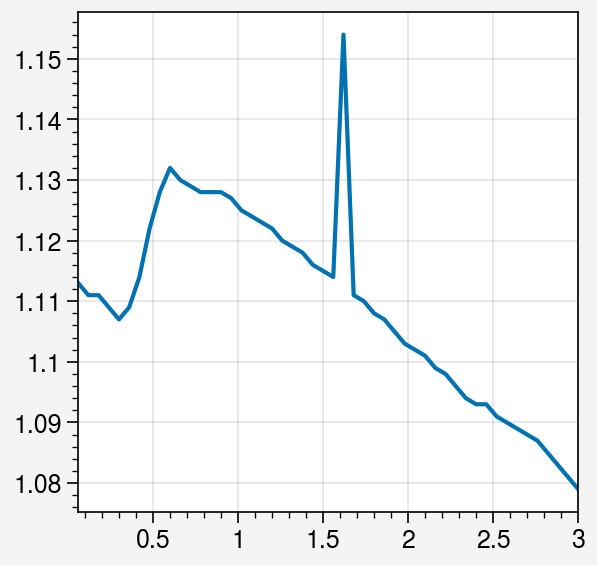

In [36]:
fig, axs = pplt.subplots()
axs.plot(c[1:], fwhm)

In [37]:
1.13/1.08

1.046296296296296

In [40]:
md = np.quantile(gmi[msk], [0.5])
v = np.quantile(gmi[msk], np.arange(4) * 0.25 + 0.25/2)
v = (v-md)*1.2 + md
print(np.arange(4) * 1.5/2 + 1.5/4, v)

[0.375 1.125 1.875 2.625] [0.30094976 0.88187496 1.34161057 2.24524787]


In [5]:
import numpy as np
import scipy.optimize as opt

DES_GMI_BE = np.array([
    -2.8886816, -2.79877759, -2.70887357, -2.61896955, -2.52906553,
    -2.43916152, -2.3492575, -2.25935348, -2.16944947, -2.07954545,
    -1.98964143, -1.89973741, -1.8098334, -1.71992938, -1.63002536,
    -1.54012135, -1.45021733, -1.36031331, -1.27040929, -1.18050528,
    -1.09060126, -1.00069724, -0.91079323, -0.82088921, -0.73098519,
    -0.64108117, -0.55117716, -0.46127314, -0.37136912, -0.28146511,
    -0.19156109, -0.10165707, -0.01175305,  0.07815096,  0.16805498,
    0.257959,  0.34786301,  0.43776703,  0.52767105, 0.61757506,
    0.70747908,  0.7973831, 0.88728712,  0.97719113,  1.06709515,
    1.15699917,  1.24690318,  1.3368072, 1.42671122,  1.51661524,
    1.60651925,  1.69642327,  1.78632729,  1.8762313, 1.96613532,
    2.05603934,  2.14594336,  2.23584737,  2.32575139,  2.41565541,
    2.50555942,  2.59546344,  2.68536746,  2.77527148,  2.86517549,
    2.95507951,  3.04498353,  3.13488754,  3.22479156,  3.31469558,
    3.4045996, 3.49450361,  3.58440763,  3.67431165,  3.76421566,
    3.85411968,  3.9440237, 4.03392771,  4.12383173,  4.21373575,
    4.30363977,  4.39354378,  4.4834478, 4.57335182,  4.66325583,
    4.75315985,  4.84306387,  4.93296789,  5.0228719, 5.11277592,
    5.20267994,  5.29258395,  5.38248797,  5.47239199,  5.56229601,
    5.65220002,  5.74210404,  5.83200806,  5.92191207,  6.01181609,
    6.10172011
])


DES_GMI_CDF = np.array([
    0.00000000e+00, 2.30887960e-06, 2.30887960e-06, 2.30887960e-06,
    4.61775921e-06, 9.23551842e-06, 1.03899582e-05, 1.38532776e-05,
    2.30887960e-05, 3.57876339e-05, 5.42586707e-05, 6.46486289e-05,
    8.65829852e-05, 1.22370619e-04, 1.66239332e-04, 2.36660159e-04,
    3.31324223e-04, 4.44459324e-04, 5.89918739e-04, 7.95409024e-04,
    1.02052479e-03, 1.30451698e-03, 1.68317323e-03, 2.18073679e-03,
    2.86416515e-03, 3.65380197e-03, 4.75051979e-03, 6.23166605e-03,
    8.22653803e-03, 1.08944484e-02, 1.46336789e-02, 1.96716542e-02,
    2.67806945e-02, 3.67319656e-02, 5.01130774e-02, 6.75335740e-02,
    8.94933279e-02, 1.17302628e-01, 1.50583973e-01, 1.89486286e-01,
    2.36229553e-01, 2.88100843e-01, 3.45242150e-01, 4.03848441e-01,
    4.64133287e-01, 5.25280500e-01, 5.82576502e-01, 6.35287069e-01,
    6.82508274e-01, 7.22752046e-01, 7.57407174e-01, 7.86948134e-01,
    8.12696760e-01, 8.34314800e-01, 8.54055720e-01, 8.71745201e-01,
    8.87671853e-01, 9.02349400e-01, 9.15968327e-01, 9.28925759e-01,
    9.40861512e-01, 9.51694775e-01, 9.60682089e-01, 9.68386820e-01,
    9.74789344e-01, 9.80054744e-01, 9.84427762e-01, 9.87958038e-01,
    9.90974590e-01, 9.93310021e-01, 9.95089013e-01, 9.96529754e-01,
    9.97524881e-01, 9.98170213e-01, 9.98704719e-01, 9.99124935e-01,
    9.99414699e-01, 9.99613263e-01, 9.99742560e-01, 9.99830297e-01,
    9.99891483e-01, 9.99936506e-01, 9.99965367e-01, 9.99971139e-01,
    9.99981529e-01, 9.99983838e-01, 9.99987301e-01, 9.99991919e-01,
    9.99996537e-01, 9.99996537e-01, 9.99996537e-01, 9.99996537e-01,
    9.99996537e-01, 9.99996537e-01, 9.99996537e-01, 9.99996537e-01,
    9.99996537e-01, 9.99996537e-01, 9.99996537e-01, 9.99998846e-01,
    1.00000000e+00
])


def _draw_des_gmi(n, rng):
    x = rng.uniform(size=n)
    return np.interp(x, DES_GMI_CDF, DES_GMI_BE)

def find_optimal_colors_lin(c_gal, n):
    """
    Find the optimal n colors to use given an instantiated set of abserved galaxy colors, c_gal.

    This version assumes that the errors m(c) are proportional to |c_gal - c_nearest|.
    """
    # The equations to solve (for n=4)
    # int_-inf..c1 dc dN/dc = int_c1..c1.5 dc dN/dc
    # int_c1.5..c2 dc dN/dc = int_c2..c2.5 dc dN/dc
    # int_c2.5..c3 dc dN/dc = int_c3..c3.5 dc dN/dc
    # int_c3.5..c4 dc dN/dc = int_c4..inf dc dN/dc

    # These integrals turn into sums over the actual values c_gal.

    # These equations can't actually be made to be equal, so this function looks for the
    # solution that minimizes the squares of the differences (lhs-rhs)**2.
    # And it turns out, that this seems to always (?) match the simple pseudo-quartile partition.

    def func(c):
        # The lhs - rhs for each of the above target equations.
        # c on input are the n points = [c1,c2,c3,c4] for n=4.
        c.sort()  # in place
        bins = np.empty(n*2)
        bins[0::2] = c
        bins[1:-1:2] = (c[:-1] + c[1:])/2.
        bins[-1] = np.inf
        
        indx = np.digitize(c_gal, bins)
        ret = np.empty(n)
        for i in range(n):
            ret[i] = np.count_nonzero(indx==2*i) - np.count_nonzero(indx==2*i+1)
        return ret

    c0 = np.quantile(c_gal, np.arange(n)/n + 1./(2*n))

    c = opt.root(func, c0).x
    c.sort()
    return c

def find_optimal_colors_quad(c_gal, n):
    """
    Find the optimal n colors to use given an instantiated set of abserved galaxy colors, c_gal.

    This version assumes that the errors m(c) are proportional to (c_gal - c_nearest)**2.
    """
    # The equations to solve (for n=4)
    # int_-inf..c1 dc (c1-c) dN/dc = int_c1..c1.5 dc (c-c1) dN/dc
    # int_c1.5..c2 dc (c2-c) dN/dc = int_c2..c2.5 dc (c-c2) dN/dc
    # int_c2.5..c3 dc (c3-c) dN/dc = int_c3..c3.5 dc (c-c3) dN/dc
    # int_c3.5..c4 dc (c4-c) dN/dc = int_c4..inf dc (c-c4) dN/dc

    # These integrals turn into sums over the actual values c_gal.

    def func(c):
        # The lhs - rhs for each of the above target equations.
        # c on input are the n points = [c1,c2,c3,c4] for n=4.
        #print('c = ',c)
        c.sort()  # in place
        #print('c => ',c)
        bins = np.empty(n*2)
        bins[0::2] = c
        bins[1:-1:2] = (c[:-1] + c[1:])/2.
        bins[-1] = np.inf
        #print('bins = ',bins)
        
        indx = np.digitize(c_gal, bins)
        ret = np.empty(n)
        for i in range(n):
            ret[i] = np.sum(c[i]-c_gal[indx==2*i]) - np.sum(c_gal[indx==2*i+1]-c[i])
        #print('sums = ',[(np.sum(c[i]-c_gal[indx==2*i]) , np.sum(c_gal[indx==2*i+1]-c[i]))
        #                 for i in range(n)])
        #print('ret = ',ret)
        return ret

    c0 = np.quantile(c_gal, np.arange(n)/n + 1./(2*n))

    c = opt.root(func, c0).x
    c.sort()
    return c

# Draw 10^7 colors
rng = np.random.default_rng()
c_gal = _draw_des_gmi(2*10**6, rng)

# # Not really quartiles.  Rather, this is every other octile.
# c_quart = np.quantile(c_gal, np.arange(4)/4 + 1./(2*4))

# # Optimized colors for linear model of errors, m(c) = |c_gal - c_nearest|
# c_lin = find_optimal_colors_lin(c_gal, 4)

# Optimized colors for quadratic model of errors, m(c) = (c_gal - c_nearest)**2
c_quad = find_optimal_colors_quad(c_gal, 12)

# print('Simple pseudo-quartiles: ',c_quart)

# print('Linear model of errors: ',c_lin)

print('Quadratic model of errors: ',c_quad)

Quadratic model of errors:  [-0.69370018 -0.01898564  0.3540114   0.64113981  0.88696638  1.12346644
  1.3670782   1.64196757  1.96983395  2.34574849  2.76583382  3.3587683 ]
